# Two Variance F-Test

Two-sample tests are appropriate for comparing two samples, typically experimental and control samples from a scientifically controlled experiment.


https://en.wikipedia.org/wiki/Test_statistic

Two-sample F test for equality of variances

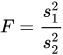


			v. Two variance test 
				1) Condition for two variance test
					a) Random samples
					b) Each observation should be independent of other
						i) Sampling with replacement
						ii) If sampling without replacement, the sample size should not be more than 10% of the population
					c) The data follows a Normal Distribution
				2) Variance Tests
					a) Chi square test
						i) For testing the population variance against a specified value (this is for One variance test)
						ii) testing goodness of fit of some probability distribution
						iii) testing for independence of two attributes (Contingency Tables)
					b) F test
						i) for testing equality of two variances from different populations
						ii) for testing equality of several means with technique of ANOVA.
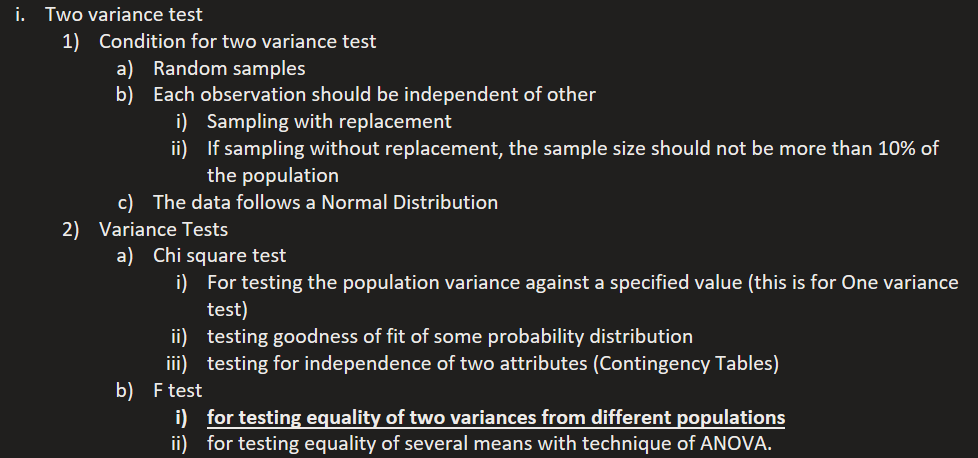


#### Manual


#### Example 1: 
Example: We took 8 samples from machine A and the standard deviation was 1.1. For machine B we took 5 samples and the variance was 11. Is there a difference in variance at 90% confidence level?

H0 : σ1**2 = σ2**2

Ha: σ1**2 ≠  σ2**2

Fcal=s1**2/s2**2

n1 = 5, s1**2 = 11, df1 = 4 

n2 = 8, s2 = 1.1, s2**2 = 1.21, df2 = 7

F calculated = 11/1.21 = 9.09 (higher value as numerator)

F critical = 0.0164 and 4.120

Reject the Ho in favor of Ha


#### Python

#### Example 1: 
Example: We took 8 samples from machine A and the standard deviation was 1.1. For machine B we took 5 samples and the variance was 11. Is there a difference in variance at 90% confidence level?

In [1]:
import scipy.stats as stats
from scipy.stats import f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Checking the Data for Equality of Variance using Bartlett test and Levene

In [11]:
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
m2 = [135, 152, 154, 169, 157]

In [12]:
np.std(m1), np.std(m2)

(1.165922381636102, 10.9288608738514)

In [14]:
# Equality of variance
f_stat, p_value = stats.bartlett(m1, m2)
f_stat, p_value

(19.105727631632714, 1.2367317910523616e-05)

In [15]:
print(f"""
The Statistic is: {f_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Statistic is: 19.105727631632714
The p-value is: 1.2367317910523616e-05 

Ho is rejected in favour of Ha


In [16]:
print("The datasets have a difference in Variance")

The datasets have a difference in Variance


### Levene

In [18]:
f_stat, p_value = stats.levene(m1, m2)
f_stat, p_value

(5.416245804750017, 0.040060452607943706)

In [19]:
print(f"""
The Statistic is: {f_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Statistic is: 5.416245804750017
The p-value is: 0.040060452607943706 

Ho is rejected in favour of Ha


<Figure size 864x648 with 0 Axes>

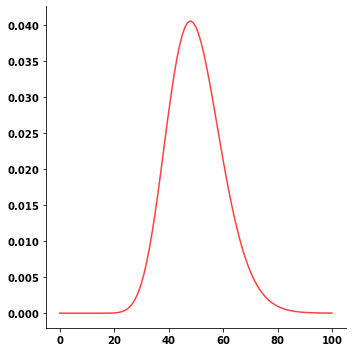

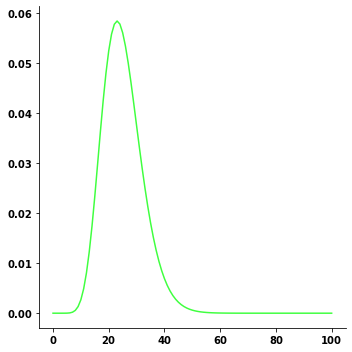

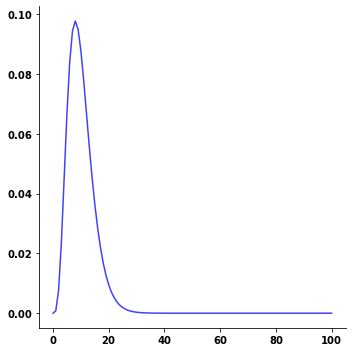

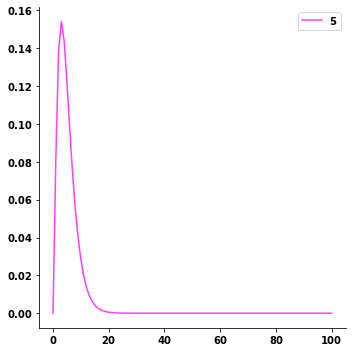

In [13]:
# Plotting a Chi-Square
plt.figure(figsize=(12, 9))
x_values = np.linspace(0, 100, 101)
y_values_50 = stats.chi2.pdf(x=x_values, df=50)
y_values_25 = stats.chi2.pdf(x=x_values, df=25)
y_values_10 = stats.chi2.pdf(x=x_values, df=10)
y_values_5 = stats.chi2.pdf(x=x_values, df=5)
sns.relplot(x=x_values, y=y_values_50, kind='line', color=[1, 0, 0, .75], label='50')
sns.relplot(x=x_values, y=y_values_25, kind='line', color=[0, 1, 0, .75], label='25')
sns.relplot(x=x_values, y=y_values_10, kind='line', color=[0, 0, 1, .75], label='10')
sns.relplot(x=x_values, y=y_values_5, kind='line', color=[1, 0, 1, .75], label='5')
plt.legend(loc='best')
plt.show()

#### Note: One Variance test library function is not available in scipy or statsmodels. We need to compute this manually using the formula

In [14]:
n = 51
s = 2.35
sigma = 2
chi_sq_cal = (n-1)*(s**2)/(sigma**2)
chi_sq_cal

69.03125000000001

In [15]:
chi_sq_est_right_10 = stats.chi2.isf(q=0.1, df=50)
chi_sq_est_right_10

63.167121005726315

In [17]:
# This is not p-value, this is the Chi-sqare value, so its greater for the area comparision
if chi_sq_cal>chi_sq_est_right_10:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")

Ho is rejected in favour of Ha



Chi-squared test for goodness of fit	
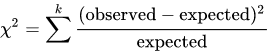

df = k − 1 − # parameters estimated, and one of these must hold.
• All expected counts are at least 5.[4]

• All expected counts are > 1 and no more than 20% of expected counts are less than 5[5]

## II) Test for Goodness of Fit

###  Example 1

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [3]:
print("""
Ho: Meal preferences are same between perceived vs actual
Ha: Meal preferences are different between perceived vs actual""")


Ho: Meal preferences are same between perceived vs actual
Ha: Meal preferences are different between perceived vs actual


In [4]:
print("""
Significance: alpha is choosen as 0.05""")


Significance: alpha is choosen as 0.05


In [5]:
print("""
The test statistic we will use Chi-Square goodness of fit""")


The test statistic we will use Chi-Square goodness of fit


In [9]:
observed_values = np.array([190, 185, 90, 35])

total_samples = observed_values.sum()

expected_values = np.array([total_samples*.3, total_samples*.45, total_samples*.2, total_samples*.05])
expected_values

array([150., 225., 100.,  25.])

In [10]:
chi_sq_stat, p_value = stats.chisquare(f_obs=observed_values, f_exp=expected_values)

In [12]:
print(p_value)

4.492718590376291e-05


In [13]:
print(f"""
Observation: p-value is {p_value} is less than 0.05.  Reject the Ho in favour of Ha

There is a difference between the observed values to the Predicted values by manager on the food choices""")


Observation: Reject the Ho in favour of Ha

There is a difference between the observed values to the Predicted values by manager on the food choices


### Practice Exercise 2
Refer to the above example 1. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [15]:
observed_values = np.array([190, 185, 90, 35])
total_samples = observed_values.sum()
expected_values = np.array([total_samples*.28, total_samples* .42, total_samples* .25, total_samples* .05])
expected_values

array([140., 210., 125.,  25.])

In [16]:
chi_sq_stat, p_value = stats.chisquare(f_obs=observed_values, f_exp=expected_values)
p_value

1.4561004918754443e-07

In [17]:
print(f"""
Observation: p-value is {p_value} is less than 0.05. Reject the Ho in favour of Ha

There is a difference between the observed values to the Predicted values by manager on the food choices""")


Observation: p-value is 1.4561004918754443e-07 is less than 0.05. Reject the Ho in favour of Ha

There is a difference between the observed values to the Predicted values by manager on the food choices


## III) Test of Independence

### Example Ind_1 

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

In [19]:
print("""
Ho: There is no difference between the parts manufactured by Male or Female

Ha: There is difference between the parts manufactured by Male or Female""")


Ho: There is no difference between the parts manufactured by Male or Female

Ha: There is difference between the parts manufactured by Male or Female


In [20]:
print("""
Significance alpha: 0.05""")


Significance alpha: 0.05


In [21]:
quality_array = np.array([[138, 83, 64], [64, 67, 84]])
chi_sq_ind_stat, p_value, deg_free, exp_freq = stats.chi2_contingency(quality_array)

In [22]:
print(f"""
We reject the Ho since {p_value} is < 0.05""")


We reject the Ho since 1.547578021398957e-05 is < 0.05


In [25]:
print(chi_sq_ind_stat)

22.152468645918482
